# Credit Risk Analysis

## Description

### Guideline:

#### 1. Data Load
#### 2. EDA
#### 3. Introduction
#### 4. Introduction
#### 5. Introduction
#### 6. Introduction
#### 7. Introduction

1. Introduction

- Info's about datasets
2. Librarys

- Importing Librarys
- Importing Dataset
3. Knowning the data

- 3.1 Looking the Type of Data
- 3.2 Shape of data
- 3.3 Null Numbers
- 3.4 Unique values
- 3.5 The first rows of our dataset
4. Exploring some Variables

- 4.1 Ploting some graphical and descriptive informations
5. Correlation of data

- 5.1 Correlation Data
6. Preprocess

- 6.1 Importing Librarys
- 6.2 Setting X and Y
- 6.3 Spliting the X and Y in train and test 
7. 1 Model 1

- 7.1.1 Random Forest 
- 7.1.2 Score values
- 7.1.3 Cross Validation 
7. 2 Model 2

- 7.2.1 Logistic Regression 
- 7.2.2 Score values
- 7.2.3 Cross Validation 
- 7.2.4 ROC Curve

### 1. Data Load

In [30]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:



# Read dataset
# The database is split in 5 files. All of them will be read and appended in a single dataframe.

data_url = "https://drive.google.com/file/d/1j_woVIKiP5Fz41wIhTv7mQnuJvf7NV9T/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="
data_url = inital_url + data_url.split('/')[-2]
df1 = pd.read_csv(data_url, dtype=str)

data_url = "https://drive.google.com/file/d/1RwzzU-E5Df2QNIB5suVcjQShmJVTFYUC/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="
data_url = inital_url + data_url.split('/')[-2]
df2 = pd.read_csv(data_url, dtype=str)

data_url = "https://drive.google.com/file/d/1bQuzUgkc9k7vlN-4lTShfLUxhLr92mny/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="
data_url = inital_url + data_url.split('/')[-2]
df3 = pd.read_csv(data_url, dtype=str)

data_url = "https://drive.google.com/file/d/1TVc644HqsW9Y6jqIO1rusiFMDDy6xGMV/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="
data_url = inital_url + data_url.split('/')[-2]
df4 = pd.read_csv(data_url, dtype=str)

data_url = "https://drive.google.com/file/d/1Z2n9FKy16QrQVG0mie_FGt4yOylHjVUs/view?usp=drive_link"
inital_url = "https://drive.google.com/uc?id="
data_url = inital_url + data_url.split('/')[-2]
df5 = pd.read_csv(data_url, dtype=str)


# Concatenate the DataFrames without including headers as rows
df = pd.concat([df1.iloc[1:], df2.iloc[1:], df3.iloc[1:], df4.iloc[1:], df5.iloc[1:]], ignore_index=True)

# Reset the index of the combined DataFrame
df.reset_index(drop=True, inplace=True)
del df1, df2, df3, df4, df5


### 2. EDA

In [13]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

# Eliminate unwanted columns. Given the nature of the analysis, columns that are used to identify individual customers
# or columns that are features of the bank process and not the burrower wil be eliminated.

columnstoeliminate = ['id','member_id','grade','verification_status','issue_d','url','desc','title','zip_code',
                      'earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_bal',
                      'revol_util','open_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt',
                      'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                      'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
                      'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type',
                      'annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt',
                      'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                      'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
                      'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m']

df = df.drop(columns= columnstoeliminate)


# As all column were loaded as strings, columns containing numerical values will be transformed. Numerical and categorical 
# columns will be identified for further treatment.

numericalcolumns = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',
                    'delinq_2yrs','total_acc','pub_rec','total_rev_hi_lim']

df[numericalcolumns] = df[numericalcolumns].astype(float)

categoricalcolumns = ['term','sub_grade','emp_title','emp_length','home_ownership','loan_status','pymnt_plan',
                      'purpose','addr_state']


# emp_length revisar y eliminar los nas
# loan_status limpiar categorias para dejar solo pagados y default.

In [15]:
print(df.shape)
df.info()

(887374, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887374 entries, 0 to 887373
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         887374 non-null  float64
 1   funded_amnt       887374 non-null  float64
 2   funded_amnt_inv   887374 non-null  float64
 3   term              887374 non-null  object 
 4   int_rate          887374 non-null  float64
 5   installment       887374 non-null  float64
 6   sub_grade         887374 non-null  object 
 7   emp_title         835913 non-null  object 
 8   emp_length        842549 non-null  object 
 9   home_ownership    887374 non-null  object 
 10  annual_inc        887370 non-null  float64
 11  loan_status       887374 non-null  object 
 12  pymnt_plan        887374 non-null  object 
 13  purpose           887374 non-null  object 
 14  addr_state        887374 non-null  object 
 15  dti               887374 non-null  float64
 16  delinq_

In [16]:
## Checking the quantity of unique values of the categorical features
for feature in categoricalcolumns:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")

term:
Number of unique values: 2
sub_grade:
Number of unique values: 35
emp_title:
Number of unique values: 299268
emp_length:
Number of unique values: 11
home_ownership:
Number of unique values: 6
loan_status:
Number of unique values: 10
pymnt_plan:
Number of unique values: 2
purpose:
Number of unique values: 14
addr_state:
Number of unique values: 51


In [17]:
# Given the high cardinality of the feature emp_title, it will be dropped from the analysis.

df = df.drop(columns=['emp_title'])
categoricalcolumns = [col for col in categoricalcolumns if col != 'emp_title']

## Checking the quantity and actual values of categorical features.
for feature in categoricalcolumns:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}\n")

term:
Number of unique values: 2
Unique values: [' 60 months' ' 36 months']

sub_grade:
Number of unique values: 35
Unique values: ['C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_length:
Number of unique values: 11
Unique values: ['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership:
Number of unique values: 6
Unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

loan_status:
Number of unique values: 10
Unique values: ['Charged Off' 'Fully Paid' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']

pymnt_plan:
Number of unique values: 2
Unique values: ['n' 'y']

purpose:
Number of unique values: 14
Unique values: ['car' 

In [ ]:
# rows with emp_lenght equal to "nan" will be dropped from the analysis.

df = df[df['emp_length'].notna()]


# home_ownership values of "None" and "Any" will be changed to "Other"

df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')


# As loan_status is the label and the analysis intends to find posible customers who actually default on their credit,
# "charged off" will be changed to "default", "fully paid" will remain the same while "Current", "late (31'120 days)"
# "in grace period", "late (16-30 days)", and both "does not meet credit policy" will be droped.

df['loan_status'] = df['loan_status'].replace(['Charged Off'], 'Default')

valuestodelete = ['Current','Late (31-120 days)','In Grace Period','Late (16-30 days)',
                  'Does not meet the credit policy. Status:Fully Paid',
                  'Does not meet the credit policy. Status:Charged Off','Issued']

df = df[~df['loan_status'].isin(valuestodelete)]


In [23]:
## Checking the quantity and actual values of categorical features after adjustments.
for feature in categoricalcolumns:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}\n")

term:
Number of unique values: 2
Unique values: [' 60 months' ' 36 months']

sub_grade:
Number of unique values: 35
Unique values: ['C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']

emp_length:
Number of unique values: 11
Unique values: ['< 1 year' '10+ years' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']

home_ownership:
Number of unique values: 4
Unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_status:
Number of unique values: 2
Unique values: ['Default' 'Fully Paid']

pymnt_plan:
Number of unique values: 2
Unique values: ['n' 'y']

purpose:
Number of unique values: 14
Unique values: ['car' 'small_business' 'other' 'wedding' 'debt_consolidation'
 'credit_card' 'home_improvement' 'major_purchase' 'medical' 'moving'
 'vacation' 'house' 'renewable_energy' 'educational']

addr_state:
Number of unique values: 51

In [25]:
# Encoding the label feature with "Default" = 1 and "Fully paid" = 0 
# and adjusting the numerical and categorical collections.

df['loan_status'] = df['loan_status'].replace(['Default'], '1')
df['loan_status'] = df['loan_status'].replace(['Fully Paid'], '0')

categoricalcolumns = [col for col in categoricalcolumns if col != 'emp_title']
numericalcolumns.append('loan_status')


In [26]:
## Checking the range of numerical features
df.describe().T[['min','max']]

,min,max
loan_amnt,500.00,35000.00
funded_amnt,500.00,35000.00
funded_amnt_inv,0.00,35000.00
int_rate,5.32,28.99
installment,15.69,1424.57
annual_inc,4000.00,8706582.00
dti,0.00,57.14
delinq_2yrs,0.00,29.00
pub_rec,0.00,15.00
total_acc,2.00,150.00


In [28]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,pub_rec,total_acc,total_rev_hi_lim
count,244220.000000,244220.000000,244220.000000,244220.000000,244220.000000,2.442200e+05,244220.000000,244220.000000,244220.000000,244220.000000,1.824220e+05
mean,13685.440382,13644.115244,13548.558208,13.773656,421.404227,7.350571e+04,16.516163,0.252019,0.139125,25.080145,2.980829e+04
std,8146.563796,8124.304691,8144.865895,4.405290,245.274182,5.944947e+04,7.767178,0.744838,0.429999,11.746676,2.950922e+04
min,500.000000,500.000000,0.000000,5.320000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,7500.000000,7500.000000,7250.000000,10.740000,243.490000,4.500000e+04,10.750000,0.000000,0.000000,16.000000,1.340000e+04
50%,12000.000000,12000.000000,12000.000000,13.530000,368.450000,6.300000e+04,16.170000,0.000000,0.000000,23.000000,2.240000e+04
75%,18675.000000,18450.000000,18225.000000,16.550000,550.515000,8.850100e+04,21.940000,0.000000,0.000000,32.000000,3.700000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,15.000000,150.000000,2.013133e+06


In [29]:
# Given the high number of blank values for 'total_rev_hi_lim' it will be dropped from the analysis.

df = df.drop(columns=['total_rev_hi_lim'])
numericalcolumns = [col for col in numericalcolumns if col != 'total_rev_hi_lim']

C:\Users\Feche\AppData\Local\Temp\ipykernel_17024\3924788328.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numericalcolumns[i]])
C:\Users\Feche\AppData\Local\Temp\ipykernel_17024\3924788328.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numericalcolumns[i]])
C:\Users\Feche\AppDa

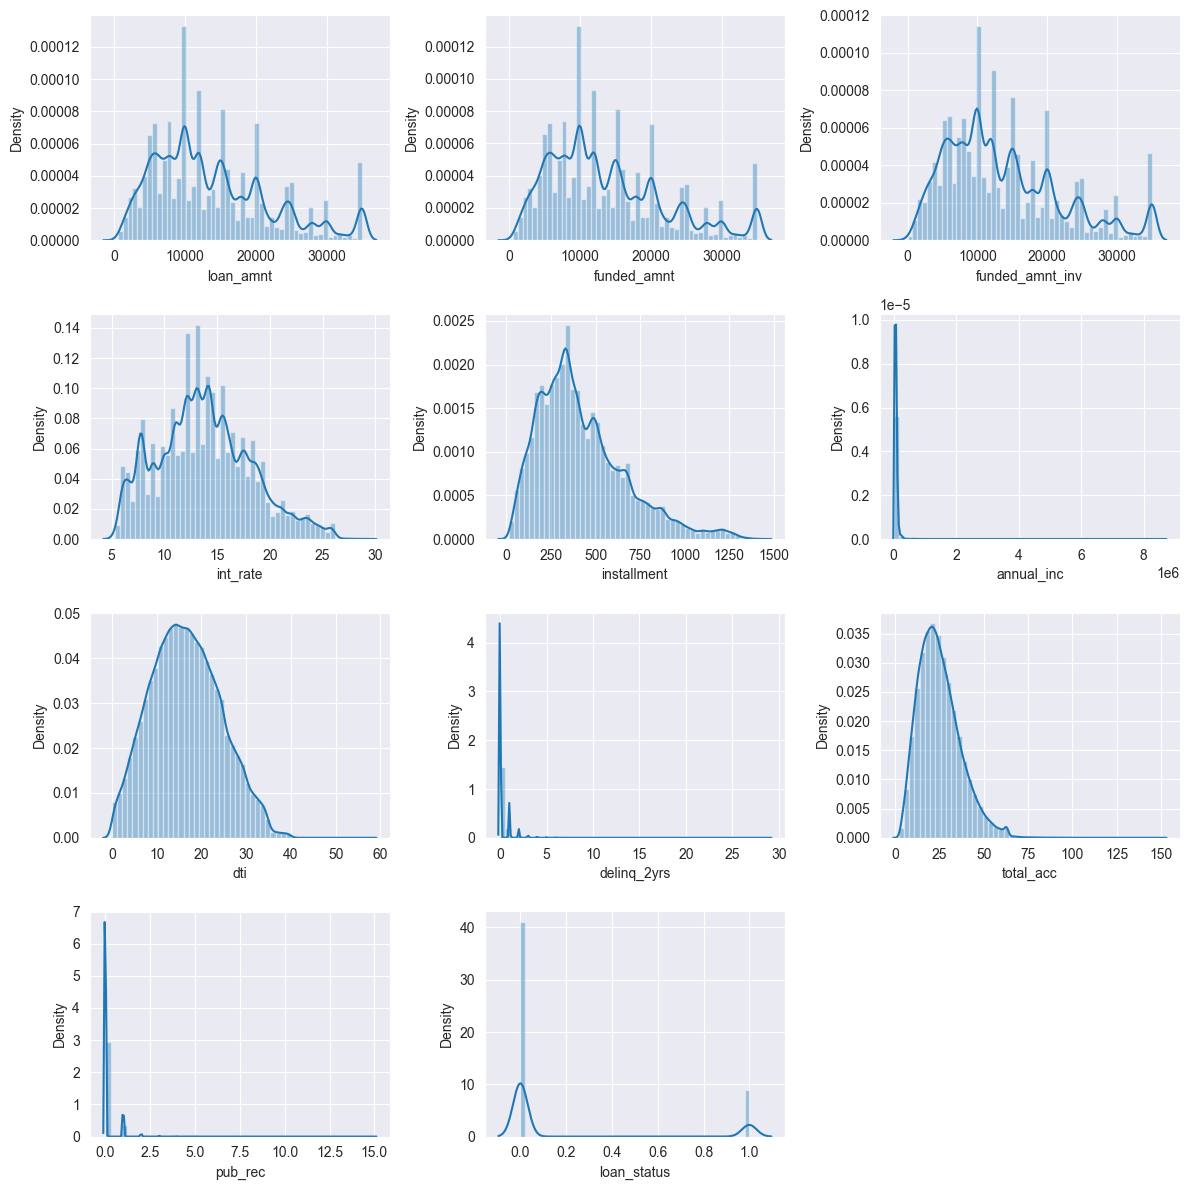

In [34]:
# Check the overall behavior of the numerical values

sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
for i in range(len(numericalcolumns)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[numericalcolumns[i]])
    plt.tight_layout()

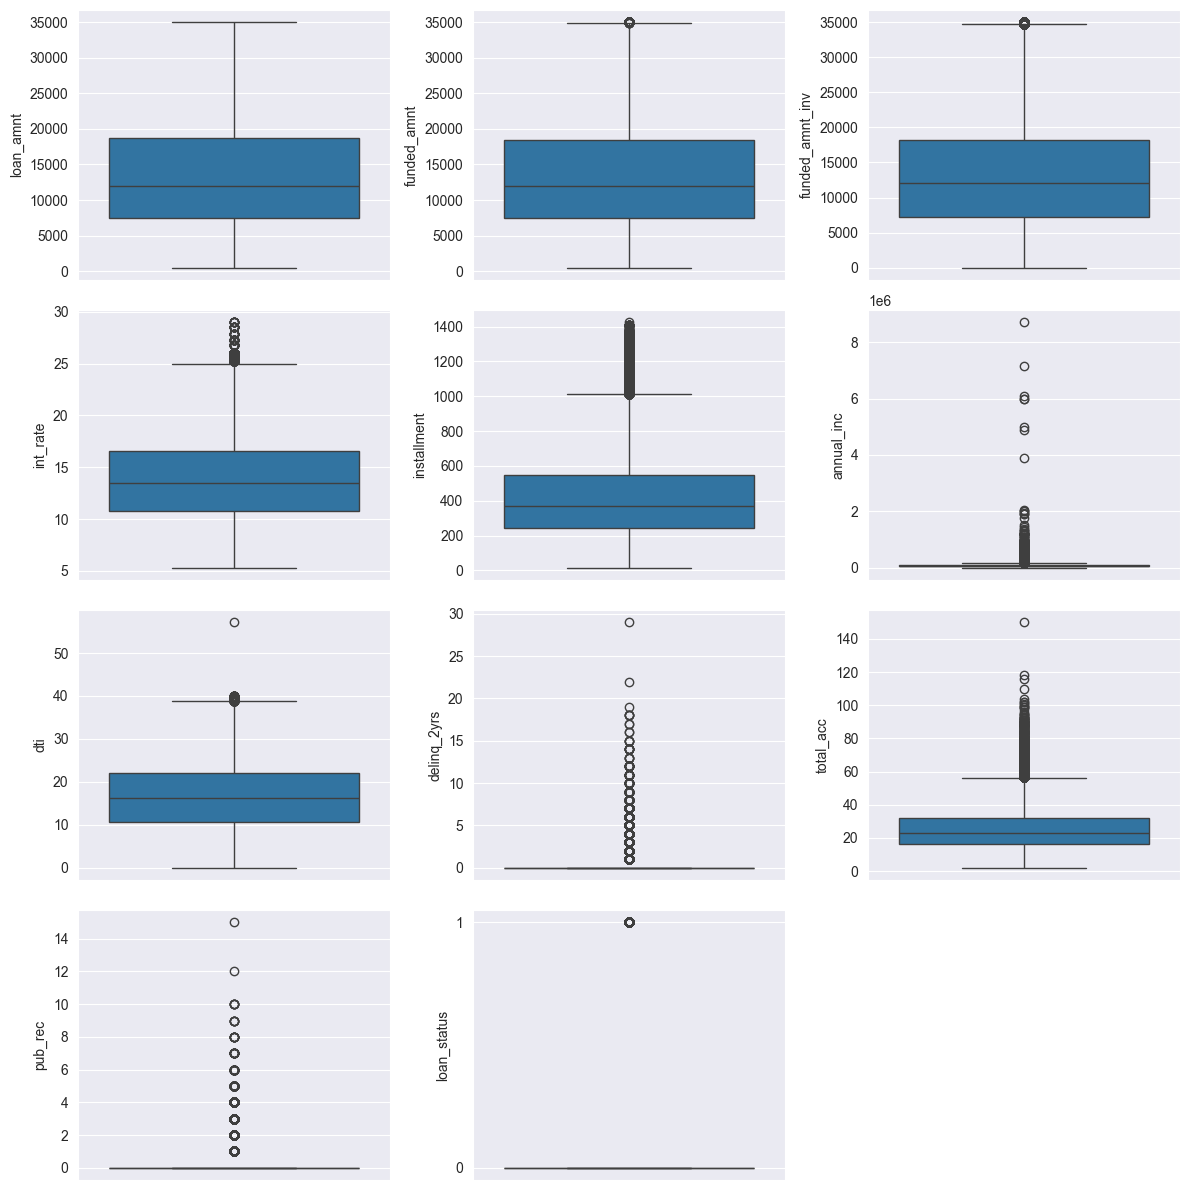

In [36]:
## check for outliers

sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
for i in range(len(numericalcolumns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[numericalcolumns[i]])
    plt.tight_layout()
plt.show()

C:\Users\Feche\AppData\Local\Temp\ipykernel_17024\514694694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


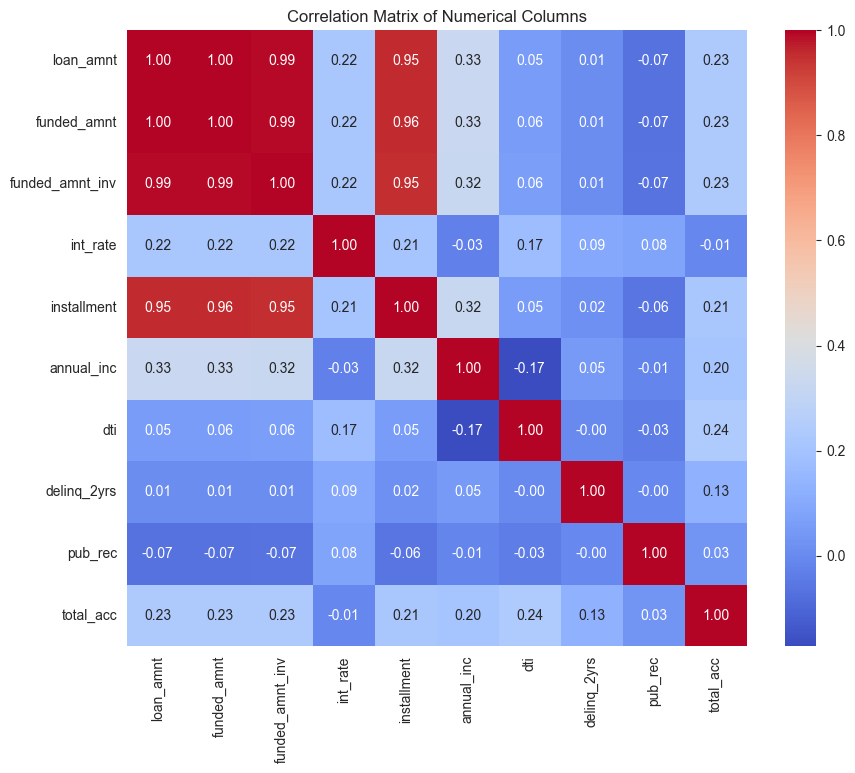

In [38]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()